This project aims to analyze the Coursera Course Dataset, applying data visualization and exploratory data analysis (EDA) techniques. The dataset contains information on Coursera courses, including attributes such as course name, provider,Top university ratings, price, and student enrollment. By performing EDA, we aim to extract actionable insights and identify patterns within the dataset.

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/coursea_data.csv',index_col=0)
df

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k
...,...,...,...,...,...,...
236,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52k
883,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21k
545,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30k
875,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.8k


In [3]:
print(df.head())
print(df.info())
print(df.describe())


                                          course_title  \
134  (ISC)² Systems Security Certified Practitioner...   
743  A Crash Course in Causality:  Inferring Causal...   
874                     A Crash Course in Data Science   
413                            A Law Student's Toolkit   
635                A Life of Happiness and Fulfillment   

            course_organization course_Certificate_type  course_rating  \
134                      (ISC)²          SPECIALIZATION            4.7   
743  University of Pennsylvania                  COURSE            4.7   
874    Johns Hopkins University                  COURSE            4.5   
413             Yale University                  COURSE            4.7   
635   Indian School of Business                  COURSE            4.8   

    course_difficulty course_students_enrolled  
134          Beginner                     5.3k  
743      Intermediate                      17k  
874             Mixed                     130k  
413       

### Data Cleaning

In [5]:
# Check for missing values
print(df.isnull().sum())

# Example: Drop rows with missing values
df = df.dropna()


course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64


## Converting the course_students_enrolled to Thousand and millions- course_students_enrolled should be an integer).

In [6]:

def convert_enrolled(value):
    """Converts enrollment strings with 'k' or 'm' to integers.

    Handles:
    - Strings with 'k' (e.g., '3.5k' -> 3500)
    - Strings with 'm' (e.g., '1.2m' -> 1200000)
    - Plain numbers (as strings or integers)
    - Invalid values (returns NaN)
    """
    if isinstance(value, str):
        value = value.lower()  # Ensure case insensitivity
        if 'k' in value:
            return int(float(value.replace('k', '')) * 1000)
        elif 'm' in value:
            return int(float(value.replace('m', '')) * 1_000_000)
    try:
        return int(value)  # Handles plain integers or strings that are numeric
    except (ValueError, TypeError):
        return pd.NA  # Return NaN for invalid or unconvertible values

# Apply the conversion function to the 'course_students_enrolled' column
df['course_students_enrolled'] = df['course_students_enrolled'].apply(convert_enrolled)


In [8]:
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000


##  Exploratory Data Analysis (EDA)

In [ ]:
print(df.describe())


       Unnamed: 0  course_rating
count  891.000000     891.000000
mean   445.000000       4.677329
std    257.353842       0.162225
min      0.000000       3.300000
25%    222.500000       4.600000
50%    445.000000       4.700000
75%    667.500000       4.800000
max    890.000000       5.000000


## Distribution of Course Ratings

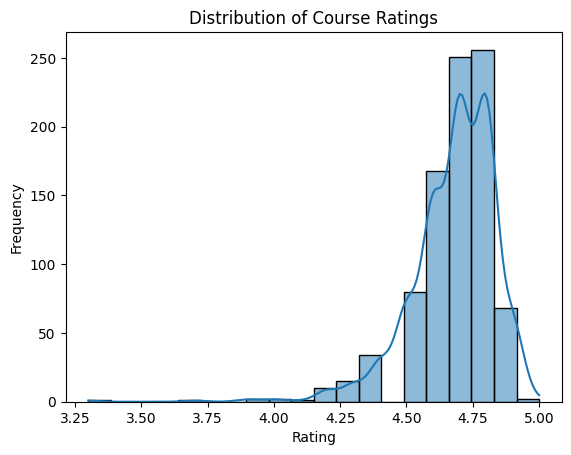

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['course_rating'], kde=True, bins=20)
plt.title('Distribution of Course Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


 ## Top 10 Courses and Organizations Based on Enrollment

<ipython-input-20-b603ed608897>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_courses, x='course_title', y='course_students_enrolled', palette='Blues_d')


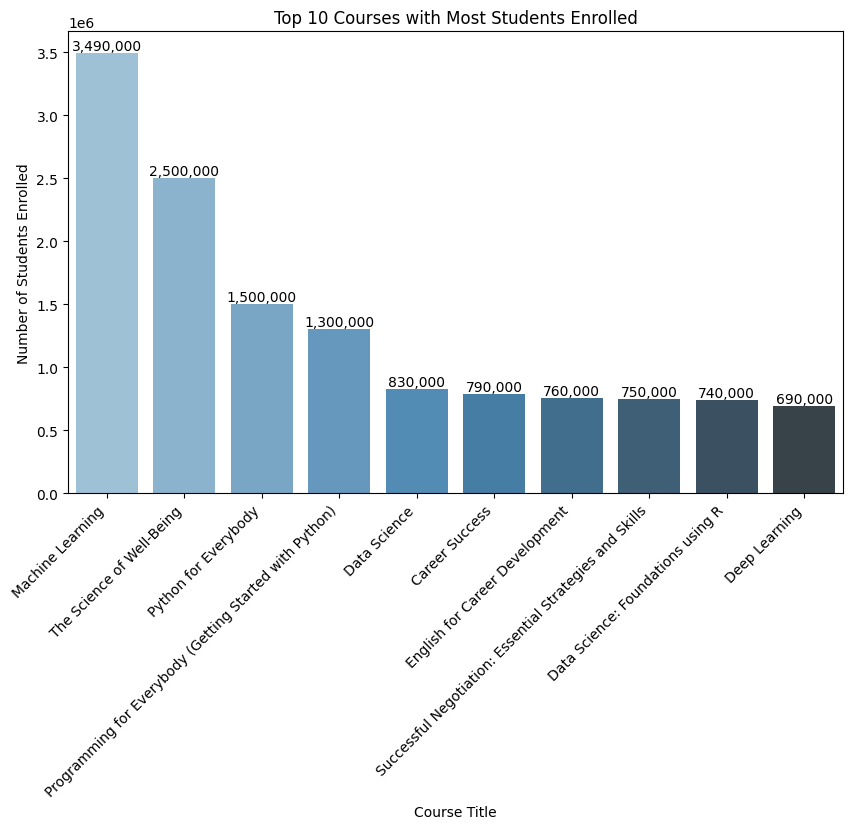

In [20]:
# Group by course title and sum the students enrolled
top_courses = df.groupby('course_title')['course_students_enrolled'].sum().reset_index()

# Sort by the number of students enrolled and get the top 10
top_courses = top_courses.sort_values(by='course_students_enrolled', ascending=False).head(10)

# Create a bar plot for the top 10 courses
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_courses, x='course_title', y='course_students_enrolled', palette='Blues_d')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',  # Format numbers with commas
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Customize the plot
plt.title('Top 10 Courses with Most Students Enrolled')
plt.xlabel('Course Title')
plt.ylabel('Number of Students Enrolled')
plt.xticks(rotation=45, ha='right')
plt.show()


### Top 10 Organizations with Most Students Enrolled

<ipython-input-21-85229cdc7272>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_organizations, x='course_organization', y='course_students_enrolled', palette='viridis')


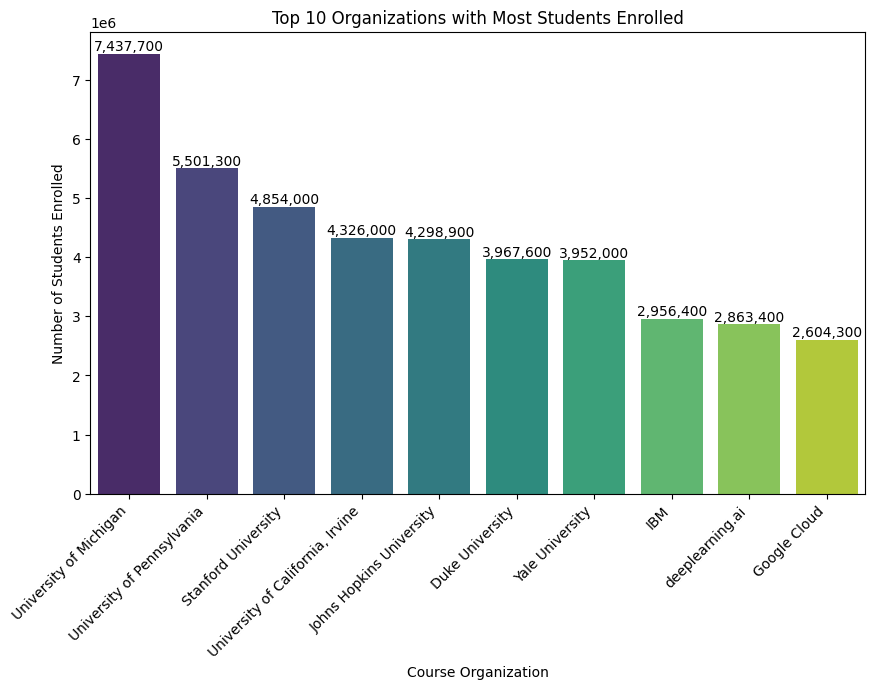

In [21]:
# Group by organization and sum the students enrolled
top_organizations = df.groupby('course_organization')['course_students_enrolled'].sum().reset_index()

# Sort by the number of students enrolled and get the top 10
top_organizations = top_organizations.sort_values(by='course_students_enrolled', ascending=False).head(10)

# Create a bar plot for the top 10 organizations
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_organizations, x='course_organization', y='course_students_enrolled', palette='viridis')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',  # Format numbers with commas
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Customize the plot
plt.title('Top 10 Organizations with Most Students Enrolled')
plt.xlabel('Course Organization')
plt.ylabel('Number of Students Enrolled')
plt.xticks(rotation=45, ha='right')
plt.show()


# A stripplot  for showing how ratings vary by course difficulty

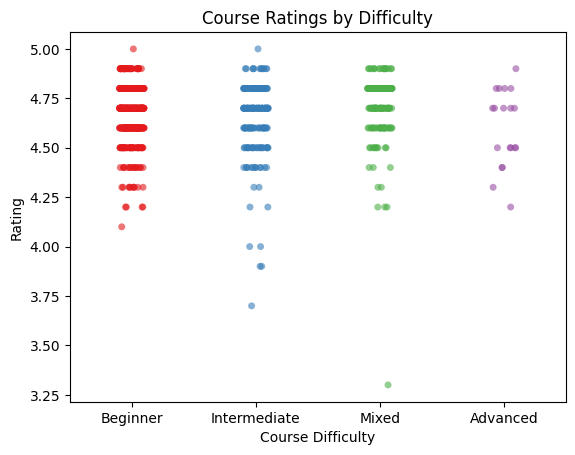

In [12]:
sns.stripplot(data=df, x='course_difficulty', y='course_rating', jitter=True, alpha=0.6, hue='course_difficulty', palette='Set1', legend=False)
plt.title('Course Ratings by Difficulty')
plt.xlabel('Course Difficulty')
plt.ylabel('Rating')
plt.show()



## Top Course Categories

In [14]:
# Group by course category and aggregate metrics
top_categories = (
    df.groupby('course_Certificate_type')
    .agg(total_enrollments=('course_students_enrolled', 'sum'),
         course_count=('course_title', 'count'))
    .sort_values(by='total_enrollments', ascending=False)
    .reset_index()
)

# Display the top categories
print(top_categories.head(10))


    course_Certificate_type  total_enrollments  course_count
0                    COURSE           51131300           582
1            SPECIALIZATION           27262200           297
2  PROFESSIONAL CERTIFICATE            2288400            12


## Course Difficulty

<ipython-input-15-5a9338477c07>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='course_difficulty', palette='Set2')


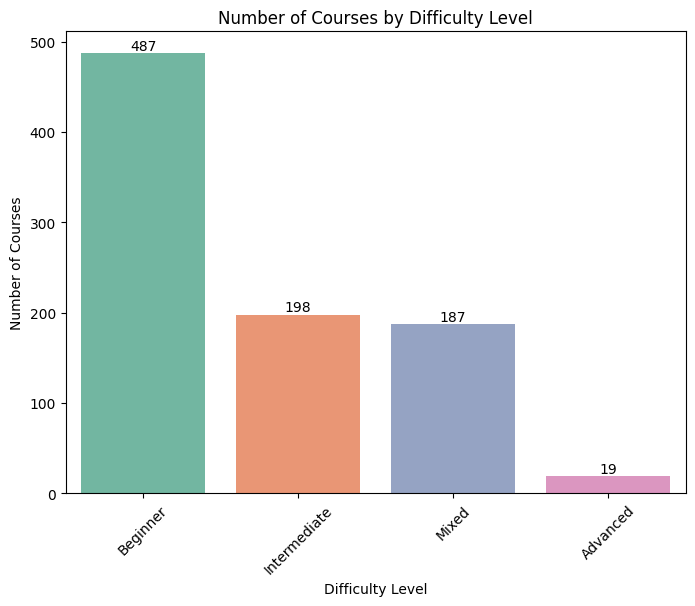

In [15]:
# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='course_difficulty', palette='Set2')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Customize the plot
plt.title('Number of Courses by Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45)
plt.show()





##  Course Certificate Type

<ipython-input-16-196c4bd9d7c4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='course_Certificate_type', palette='Set1')


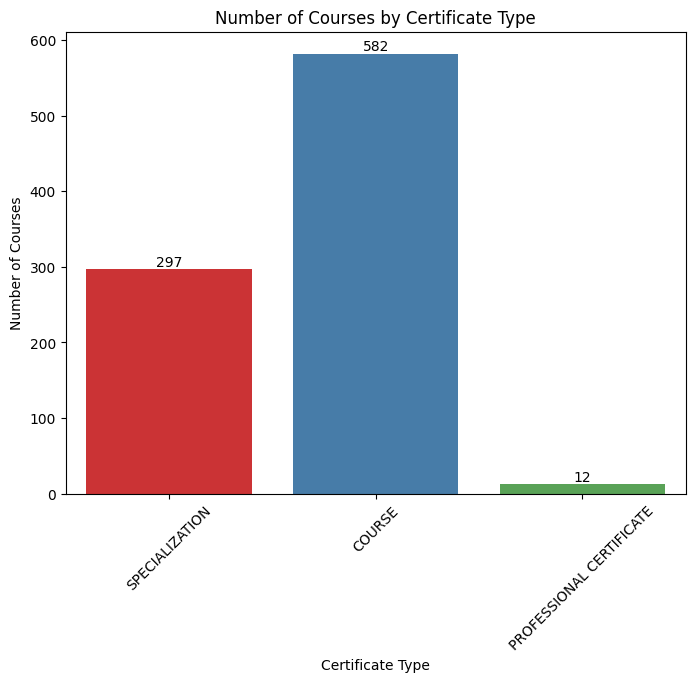

In [16]:
# Course Certificate Type
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='course_Certificate_type', palette='Set1')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Customize the plot
plt.title('Number of Courses by Certificate Type')
plt.xlabel('Certificate Type')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45)
plt.show()


##  Number of Students Enrolled by Certificate Type


<ipython-input-17-05bc490b0eee>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=enrollment_by_certificate,


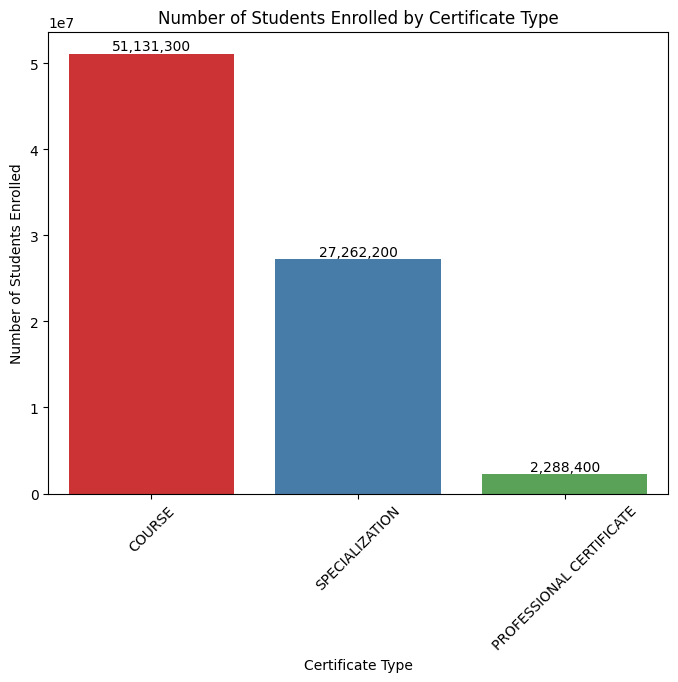

In [17]:
# Aggregate data: sum of students enrolled by certificate type
enrollment_by_certificate = (
    df.groupby('course_Certificate_type')['course_students_enrolled']
    .sum()
    .reset_index()
    .sort_values(by='course_students_enrolled', ascending=False)
)

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=enrollment_by_certificate,
                 x='course_Certificate_type',
                 y='course_students_enrolled',
                 palette='Set1')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',  # Format numbers with commas
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Customize the plot
plt.title('Number of Students Enrolled by Certificate Type')
plt.xlabel('Certificate Type')
plt.ylabel('Number of Students Enrolled')
plt.xticks(rotation=45)
plt.show()


##  Plot Number of Students Enrolled by Difficulty Level

<ipython-input-18-1d90bec0d807>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=enrollment_by_difficulty,


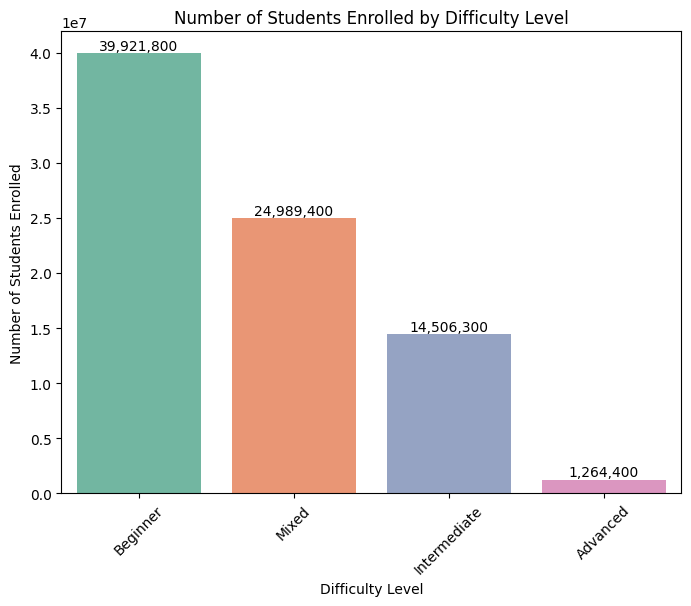

In [18]:
# Aggregate data: sum of students enrolled by difficulty level
enrollment_by_difficulty = (
    df.groupby('course_difficulty')['course_students_enrolled']
    .sum()
    .reset_index()
    .sort_values(by='course_students_enrolled', ascending=False)
)

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=enrollment_by_difficulty,
                 x='course_difficulty',
                 y='course_students_enrolled',
                 palette='Set2')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',  # Format numbers with commas
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Customize the plot
plt.title('Number of Students Enrolled by Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Number of Students Enrolled')
plt.xticks(rotation=45)
plt.show()


Beginner courses have higher enrollment comparing to all other

##  A Boxplot of Average Ratings by Course Difficulty



<ipython-input-19-738173d4e923>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='course_difficulty', y='course_rating', palette='Set3')


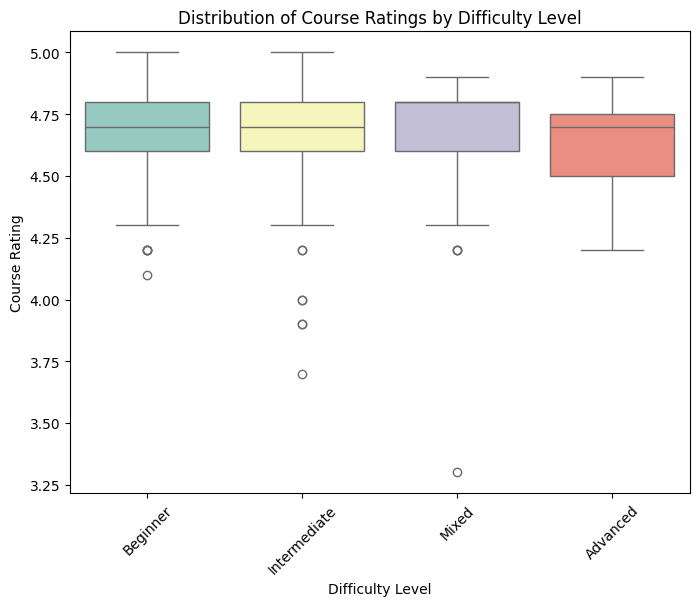

In [19]:
# Create a boxplot to visualize the distribution of ratings by course difficulty
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='course_difficulty', y='course_rating', palette='Set3')

# Customize the plot
plt.title('Distribution of Course Ratings by Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Course Rating')
plt.xticks(rotation=45)
plt.show()


## Correlation Heatmap
Relationships between numerical features (e.g., course rating and student enrollment).

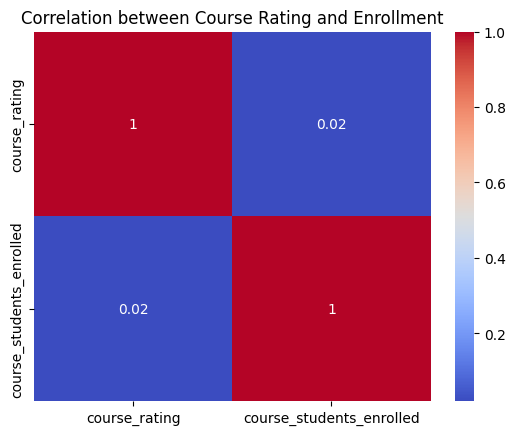

In [ ]:
# Convert 'course_students_enrolled' to numeric, handling errors
df['course_students_enrolled'] = pd.to_numeric(df['course_students_enrolled'], errors='coerce')

# Convert 'course_rating' to numeric, handling errors
df['course_rating'] = pd.to_numeric(df['course_rating'], errors='coerce')

correlation_matrix = df[['course_rating', 'course_students_enrolled']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Course Rating and Enrollment')
plt.show()


Recommendations  And Insights
## Course Ratings

- The majority of courses have high ratings, with an average of 4.68. The ratings are concentrated between 4.6 and 4.8, suggesting overall positive feedback from learners.
Course Enrollment

- Courses with the "Mixed" difficulty level have the highest average enrollment, followed by Beginner courses. This indicates that courses catering to a broader range of difficulty levels attract more learners.

- The top 10 most-enrolled courses are mostly in data and programming, showing significant interest in certain topics.

## Certificate Types

- Courses categorized under "COURSE" have the highest average rating (4.71) compared to other certificate types like "SPECIALIZATION" (4.62) and "PROFESSIONAL CERTIFICATE" (4.70).
- Focus on Mixed-Level Courses

- Develop more "Mixed" difficulty courses, as these attract the most students. Consider creating courses that bridge foundational concepts with advanced applications.
Improve Specialization Courses
